/srv/conda/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


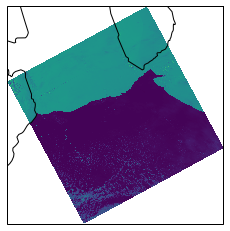

In [3]:
from pathlib import Path
import numpy as np
import cartopy.crs as ccrs
import rasterio
import matplotlib.pyplot as plt


DATA_DIR = Path('./data')
LANDSAT_FILENAMES = [
    'LC08_L1GT_033116_20180127_20180207_01_T2_B2.TIF',
    'LC08_L1GT_033116_20180127_20180207_01_T2_B3.TIF',
    'LC08_L1GT_033116_20180127_20180207_01_T2_B4.TIF',
]
SUBSAMPLE = 5

for filename in LANDSAT_FILENAMES:
    rgb = []
    with rasterio.open(DATA_DIR / filename, 'r') as src:
        # read image into ndarray
        im = src.read(1).astype(float)
        im[im == 0] = np.nan

        # subsampling
        im = im[::SUBSAMPLE, ::SUBSAMPLE]

        rgb.append(im)

        # this is redundant since should be the same for each
        transform = src.transform
        width, height = src.width, src.height

# calculate extent of raster
xmin = transform[2]
xmax = transform[2] + transform[0] * width
ymin = transform[5] + transform[4] * height
ymax = transform[5]

# define cartopy crs for the raster, based on rasterio metadata
src_crs = ccrs.SouthPolarStereo(true_scale_latitude=-71)

# create figure
ax = plt.axes(projection=src_crs)

# plot raster
ax.imshow(
    im,
    origin='upper',
    extent=[xmin, xmax, ymin, ymax],
    transform=src_crs,
    interpolation='nearest',
)

# plot coastlines
ax.coastlines(resolution='10m');